Step-3

In [237]:
#importing libraries 
import cv2
import numpy as np 
import matplotlib.pyplot as plt 



Step-4

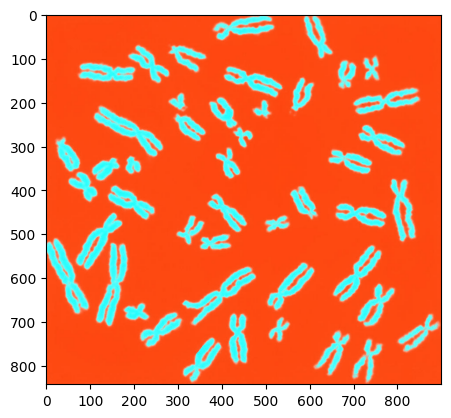

In [238]:
#reading the image in BGR format (openCV utilises BGR format while matplotlib uses RGB format)
image_reading = cv2.imread("chromosomes.jpg")
'''if you want to convert it in RGB form , it would be the same output as the image given 
image_rgb = cv2.cvtColor(image_reading , cv2.COLOR_BGR2RGB)'''
plt.imshow(image_reading)



Step-5


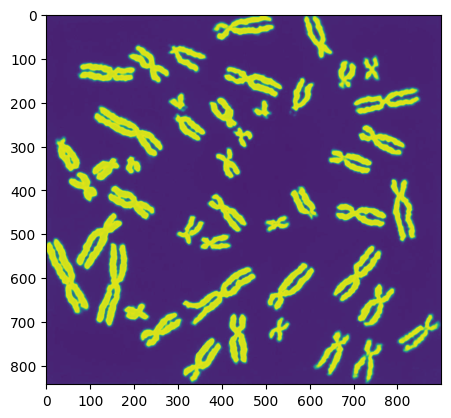

In [239]:
convert = cv2.cvtColor(image_reading , cv2.COLOR_BGR2GRAY)
plt.imshow(convert)
#conevrting the image into grey color reduces the amount of data the computer needs to process (Ex: R-G-B) . But with grey color , the process depends only on intensity 

Step-6

Morphological Opening 

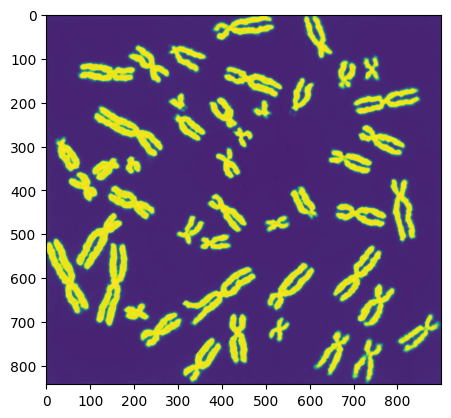

In [240]:
#creating a structuring element 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(convert, cv2.MORPH_OPEN, kernel)
plt.imshow(kernel) #displays the shape of kernel we took to sweep along the peri-phery of each chromosome
plt.imshow(opening)

Thresholding

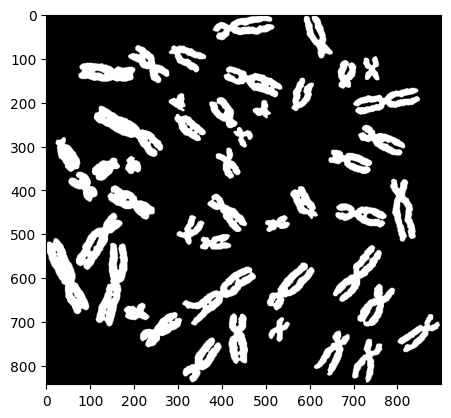

In [241]:
#we use a greyscle image to convert it into black and white image . 
_, thresh = cv2.threshold(opening, 127, 255, cv2.THRESH_BINARY )
plt.imshow(thresh , cmap="gray")
#without cmap , matplotlib uses the same colours as present before conversion as a result there's no mapping of black and white colors .

Finding contours

In [242]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


Step-7

Contour count and bounding boxes 

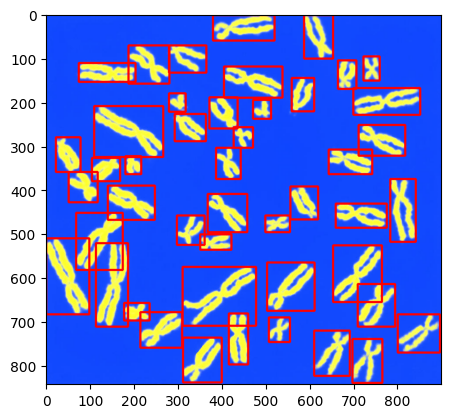

In [243]:
thresh_value = 5
image_rgb = cv2.cvtColor(image_reading , cv2.COLOR_BGR2RGB)

for c in contours:
    if len(contours) >= thresh_value:
        x , y , w , h = cv2.boundingRect(c)
        cv2.rectangle(image_rgb , (x,y) , (x+w , y+h) , ( 255 , 0 , 0  ) , 3 )
plt.imshow(image_rgb)         



Extract Features

In [244]:
x, y, width, height = cv2.boundingRect(c)
area = cv2.contourArea(c)
perimeter = cv2.arcLength(c, True)
circularity = (4 * np.pi * area) / (perimeter ** 2)




Storing in a DataFrame

In [245]:
import pandas as pd

data = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    

    data.append([h, w, area, perimeter, circularity])

df = pd.DataFrame(data, columns=[
    "Height",
    "Width",
    "Area",
    "Perimeter",
    "Circularity"
])
df

,Height,Width,Area,Perimeter,Circularity
0,100,68,2494.5,415.948265,0.181182
1,102,88,3493.5,391.546243,0.286355
2,103,81,2827.5,439.487368,0.183958
3,56,48,1159.5,217.237588,0.308753
4,87,96,2601.5,445.771639,0.164516
5,116,44,3683.0,372.735062,0.333128
6,81,95,3281.0,319.705624,0.403381
7,40,58,1444.5,187.237588,0.517775
8,97,85,3639.5,343.948265,0.386603
9,134,167,5937.0,547.269113,0.249101


Standardization 


In [246]:
'''
General formula : 
     Feature_new = (Feature_present - mean ) / st.dev
Making features comparable by bringing their values on the same platform / range . 
The shape of original distribution is not affected 

'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_stan = pd.DataFrame(scaler.fit_transform(df) , columns = df.columns)
df_stan.head()

,Height,Width,Area,Perimeter,Circularity
0,0.546875,-0.421142,-0.296743,0.512761,-1.144109
1,0.604244,0.176776,0.403320,0.335689,-0.436213
2,0.632929,-0.032496,-0.063389,0.683571,-1.125421
3,-0.715241,-1.019060,-1.232261,-0.929174,-0.285458
4,0.173977,0.415943,-0.221761,0.729173,-1.256282


Observation : 

In [247]:
'''
After standardization , features such as Area and Perimeter
which originally had larger values are now suitable for distance-based analysis. 

Example : 
Compare the features of chomosome 0 and chromosome 1 

'''


'\nAfter standardization , features such as Area and Perimeter\nwhich originally had larger values are now suitable for distance-based analysis. \n\nExample : \nCompare the features of chomosome 0 and chromosome 1 \n\n'

Normalization

In [248]:
'''
We use Min-Max scaling to compress the large numeric values btw 0 and 1 .
Ideal when distribution is not Gaussian .  
'''
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
df_normal = pd.DataFrame( normalize.fit_transform(df),columns=df.columns)
df_normal.head()


,Height,Width,Area,Perimeter,Circularity
0,0.419355,0.244275,0.302192,0.554517,0.105541
1,0.432258,0.396947,0.483944,0.506503,0.295451
2,0.438710,0.343511,0.362776,0.600832,0.110555
3,0.135484,0.091603,0.059310,0.163533,0.335895
4,0.335484,0.458015,0.321659,0.613197,0.075448


Observation : 

In [249]:
'''
Chromosomes with values closer to 1 represent the largest or most dominant shapes in that feature,
while values near 0 represent the smallest.
Size-based features such as height, width, area, and perimeter
can be easily ranked across chromosomes.
Normalization is especially useful for visual comparison and 
ranking of chromosomes within the same image . 
'''

'\nChromosomes with values closer to 1 represent the largest or most dominant shapes in that feature,\nwhile values near 0 represent the smallest.\nSize-based features such as height, width, area, and perimeter\ncan be easily ranked across chromosomes.\nNormalization is especially useful for visual comparison and \nranking of chromosomes within the same image . \n'